# Taller Delitos Sexuales
### Jesús Ernesto Suárez Triana
### Maestria en Inteligencia Artifical

# Libraries

In [1]:
# Execute and restart kernel to continue code
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [27]:
# Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt

# My Drive connection
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Global Variable

In [3]:
path = '/content/drive/MyDrive/javeriana/gestion del dato/delitos-sexuales-2019m.xlsx'

# Cargar los datos

In [4]:
df = pd.read_excel(path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33790 entries, 0 to 33789
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               33790 non-null  datetime64[ns]
 1   Departamento        33790 non-null  object        
 2   Municipio           33790 non-null  object        
 3   DELITO              33790 non-null  object        
 4   Día                 33790 non-null  object        
 5   Hora                33790 non-null  object        
 6   Barrio              33790 non-null  object        
 7   Zona                33790 non-null  object        
 8   Clase de sitio      33790 non-null  object        
 9   Arma empleada       33790 non-null  object        
 10  Móvil Agresor       33790 non-null  object        
 11  Móvil Victima       33790 non-null  object        
 12  Edad                33790 non-null  object        
 13  Sexo                33790 non-null  object    

In [5]:
df.head()

,Fecha,Departamento,Municipio,DELITO,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,...,Móvil Victima,Edad,Sexo,Estado civil,País de nacimiento,Clase de empleado,Profesión,Escolaridad,Código DANE,Cantidad
0,2019-01-01,AMAZONAS,LETICIA (CT),ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,Martes,18:00:00,NO REPORTADO,RURAL,CASAS DE APUESTAS,SIN EMPLEO DE ARMAS,...,A PIE,7,FEMENINO,-,COLOMBIA,NO REPORTA,-,-,91001000,1
1,2019-01-01,AMAZONAS,LETICIA (CT),ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,Martes,18:00:00,NO REPORTADO,RURAL,CASAS DE APUESTAS,SIN EMPLEO DE ARMAS,...,A PIE,21,FEMENINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,-,PRIMARIA,91001000,1
2,2019-01-01,ANTIOQUIA,ABRIAQUÍ,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,Martes,00:00:00,SAN JOSE,RURAL,FINCAS Y SIMILARES,SIN EMPLEO DE ARMAS,...,A PIE,16,FEMENINO,SOLTERO,COLOMBIA,ESTUDIANTE,-,SECUNDARIA,5004000,1
3,2019-01-01,ANTIOQUIA,AMAGÁ,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,Martes,10:00:00,LA GUALI,RURAL,FINCAS Y SIMILARES,SIN EMPLEO DE ARMAS,...,A PIE,4,FEMENINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADA,SECUNDARIA,5030000,1
4,2019-01-01,ANTIOQUIA,AMAGÁ,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,Martes,10:00:00,LA GUALI,RURAL,FINCAS Y SIMILARES,SIN EMPLEO DE ARMAS,...,A PIE,8,FEMENINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADA,PRIMARIA,5030000,1


# Analizar las estadísticas de la información recopilada de los delitos sexuales

In [6]:
prof = ProfileReport(df, title = 'RAW EDA',html={'style' : {'full_width':True}})
prof.to_file(output_file='first_analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
prof

### Comentarios generales
<font color='red'> Pendiente de agregar comentarios</font>

# Visualizar un conjunto de atributos de delitos sexuales

Inicialmente realizamos un print de la distribución de delitos sexuales


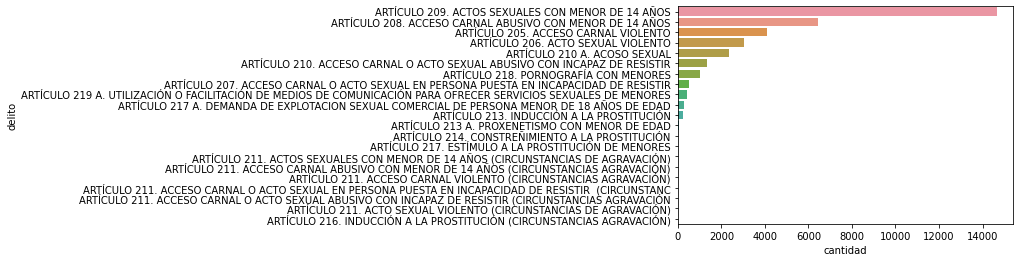

Con base al histograma, realizaremos un exploratorio del caso de ACTOS SEXUALES CON MENOR DE 14 AÑOS


In [29]:
aux = df.groupby('DELITO').agg(cantidad= ('Cantidad', 'sum')).reset_index()
aux.rename(columns= {'DELITO': 'delito'}, inplace=True)
aux.sort_values('cantidad', ascending =False, inplace=True)

print('Inicialmente realizamos un print de la distribución de delitos sexuales')
sns.barplot(data=aux, y='delito', x= 'cantidad', orient='h')
plt.show()

print('Con base al histograma, realizaremos un exploratorio del caso de ACTOS SEXUALES CON MENOR DE 14 AÑOS')

In [65]:
def factor_plot(x_, y_, hue_, title_):
  global df
  delito_select = 'ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS'
  aux = df.loc[df.DELITO == delito_select]
  aux = df.groupby([y_, hue_]).agg(cantidad= (x_, 'sum')).reset_index()
  aux.sort_values('cantidad', ascending =False, inplace=True)

  ax = sns.factorplot(data = aux, y=y_, x='cantidad', hue=hue_)
  ax.set(title=title_)
  plt.show()


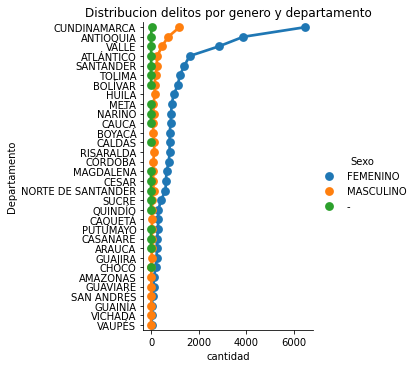

In [66]:
factor_plot(y_= 'Departamento', x_='Cantidad', hue_='Sexo',
            title_ ='Distribucion delitos por genero y departamento' )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


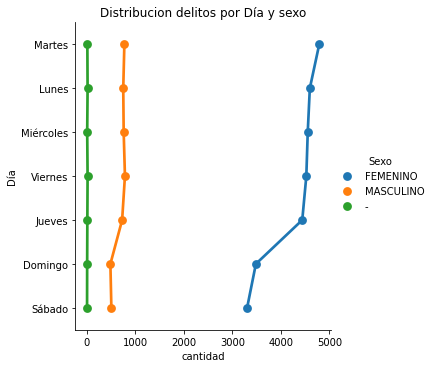

In [68]:
factor_plot(y_= 'Día', x_='Cantidad', hue_='Sexo',
            title_ ='Distribucion delitos por Día y sexo' )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


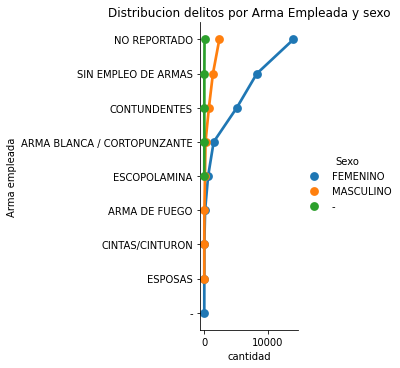

In [71]:
factor_plot(y_= 'Arma empleada', x_='Cantidad', hue_='Sexo',
            title_ ='Distribucion delitos por Arma Empleada y sexo' )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


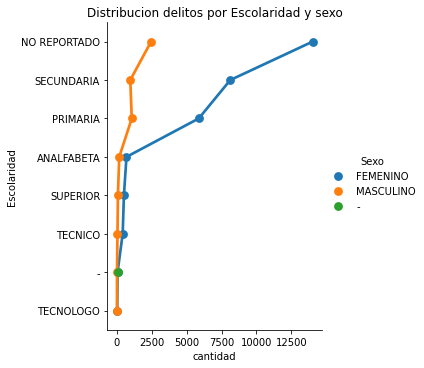

In [72]:
factor_plot(y_= 'Escolaridad', x_='Cantidad', hue_='Sexo',
            title_ ='Distribucion delitos por Escolaridad y sexo' )

### Comentarios generales
<font color='red'> Pendiente de agregar comentarios</font>

# Exportar las estadísticas obtenidas de los delitos sexuales

# Evaluar la dispersión de la edad

In [85]:
def temp(x):
  try:
    return int(x)
  except: 
    return None
df = df.assign(Edad = df.Edad.apply(temp))
del temp
df.Edad.describe()

count    33699.00000
mean        15.34550
std          9.97309
min          0.00000
25%         10.00000
50%         13.00000
75%         18.00000
max         93.00000
Name: Edad, dtype: float64

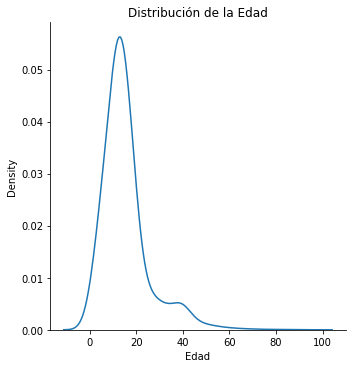

In [87]:
ax = sns.displot(data=df, x='Edad', kind='kde', bw_adjust=3)
ax.set(title='Distribución de la Edad')

[Text(0.5, 1.0, 'Distribución de la Edad')]

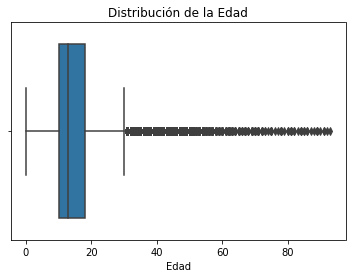

In [88]:
ax = sns.boxplot(data=df, x='Edad')
ax.set(title='Distribución de la Edad')